<a href="https://colab.research.google.com/github/KaziShahHamza/Colab-Codes/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ======================================
# 1. Setup & Libraries
# ======================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# ======================================
# 2. Load Dataset
# ======================================
# Option A: Load from Google Drive
from google.colab import drive
drive.mount('/content/drive')

# file_path = "/content/drive/MyDrive/datasets/iris.data"
# columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

df = pd.read_csv("/content/drive/MyDrive/datasets/Titanic-Dataset.csv")

# Option B: Load directly from GitHub (example: Iris)
# df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

print("Shape:", df.shape)
print(df.head())


Mounted at /content/drive
Shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0    

In [ ]:
# Quick info
print(df.info())

# Basic stats
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [ ]:
# Family size
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

# Extract Title from Name
df["Title"] = df["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)
df["Title"] = df["Title"].replace(
    ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
df["Title"] = df["Title"].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})

# Encode Title
df = pd.get_dummies(df, columns=["Title"], drop_first=True)

# Drop Cabin (too many missing), Ticket, and Name
df = df.drop(columns=["Cabin", "Ticket", "Name"])

In [ ]:
# Fill missing Age with median
df["Age"] = df["Age"].fillna(df["Age"].median())

# Fill missing Embarked with mode
if "Embarked" in df.columns:
  df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
else:
  print("Column 'Embarked' not found in DataFrame.")

In [ ]:
# Encode Sex
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# One-hot encode Embarked
if "Embarked" in df.columns:
  df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)
else:
  print("Column 'Embarked' not found in DataFrame. Skipping one-hot encoding.")

In [ ]:
# Fill missing Sex with a placeholder value (e.g., -1 or the mode)
# We'll use -1 as a placeholder since 0 and 1 are used for male/female
df["Sex"] = df["Sex"].fillna(-1)

# Dynamically select feature columns, excluding 'Survived' and 'PassengerId'
feature_columns = [col for col in df.columns if col not in ["Survived", "PassengerId"]]

X = df[feature_columns]
y = df["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_imputed, y_train)

# Predict
y_pred = model.predict(X_test_imputed)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8044692737430168


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[88 17]
 [18 56]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.8324022346368715


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8324022346368715


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_imputed, y_train)
y_pred_knn = knn.predict(X_test_imputed)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.7262569832402235


In [ ]:
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

svm = SVC(kernel="rbf", C=1, gamma=0.1)
svm.fit(X_train_imputed, y_train)
y_pred_svm = svm.predict(X_test_imputed)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.6983240223463687


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
gb.fit(X_train_imputed, y_train)
y_pred_gb = gb.predict(X_test_imputed)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8268156424581006


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8324022346368715


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

print("Best RF params:", grid.best_params_)
print("Best RF accuracy:", grid.best_score_)


Best RF params: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Best RF accuracy: 0.8356347877474638


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.impute import SimpleImputer

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


ensemble = VotingClassifier(
    estimators=[("lr", model), ("rf", rf), ("gb", gb), ("svm", svm)],
    voting="hard"
)
ensemble.fit(X_train_imputed, y_train)
y_pred_ens = ensemble.predict(X_test_imputed)

print("Ensemble Accuracy:", accuracy_score(y_test, y_pred_ens))

Ensemble Accuracy: 0.8212290502793296


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


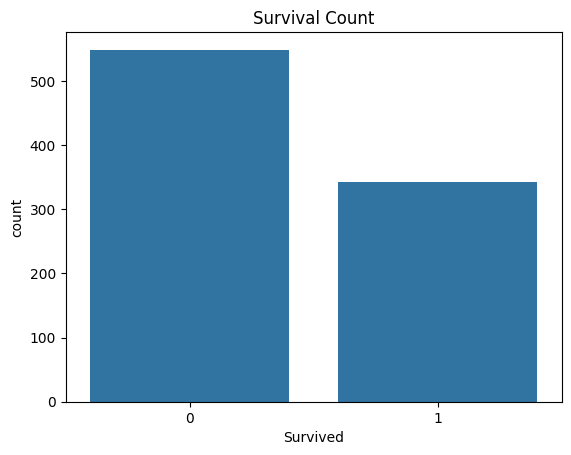

In [ ]:
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()


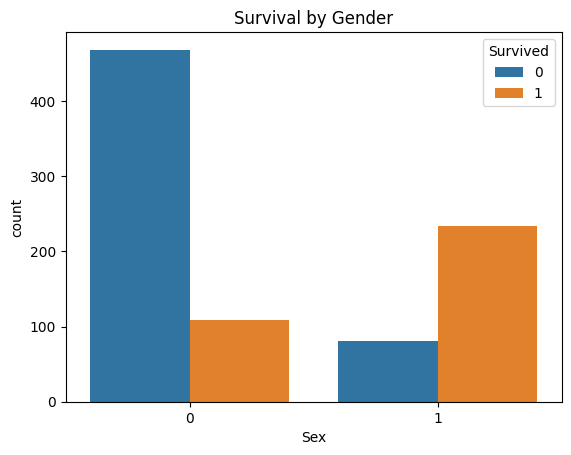

In [ ]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.show()


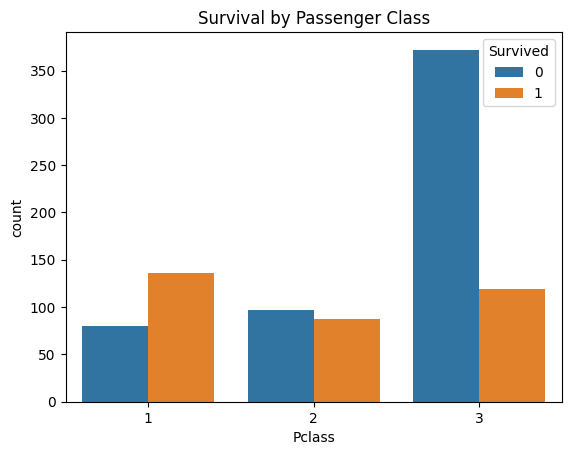

In [ ]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()


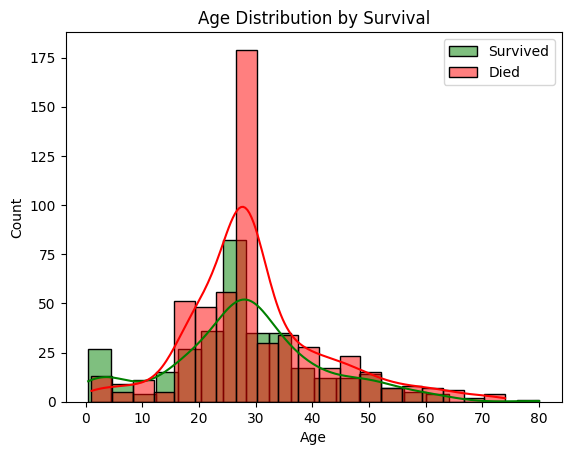

In [ ]:
sns.histplot(df[df["Survived"]==1]["Age"], kde=True, bins=20, color="green", label="Survived")
sns.histplot(df[df["Survived"]==0]["Age"], kde=True, bins=20, color="red", label="Died")
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()


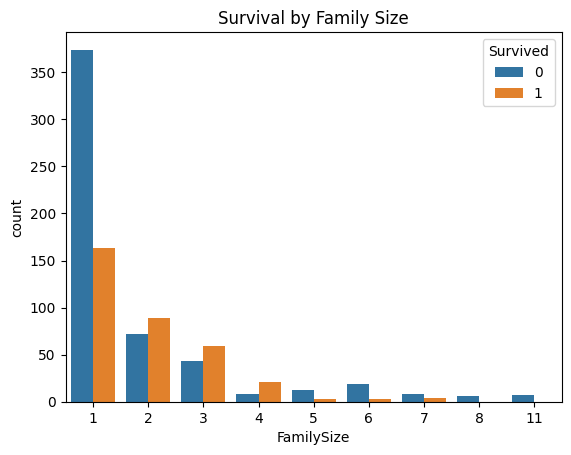

In [ ]:
sns.countplot(x="FamilySize", hue="Survived", data=df)
plt.title("Survival by Family Size")
plt.show()


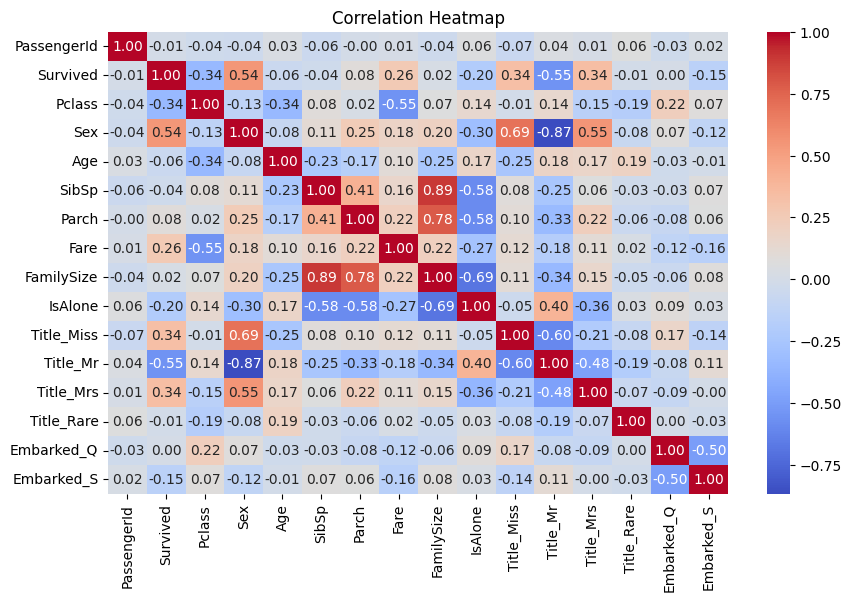

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


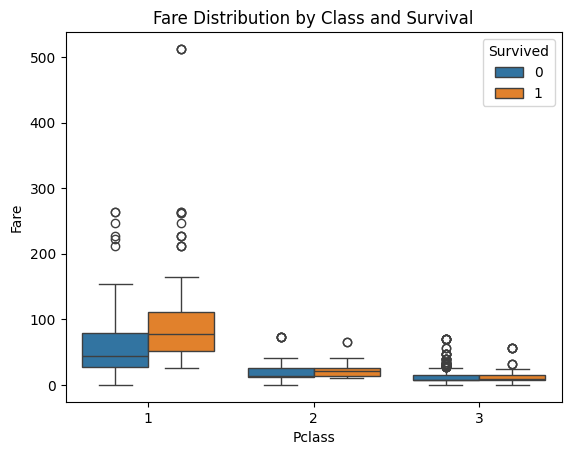

In [ ]:
sns.boxplot(x="Pclass", y="Fare", hue="Survived", data=df)
plt.title("Fare Distribution by Class and Survival")
plt.show()


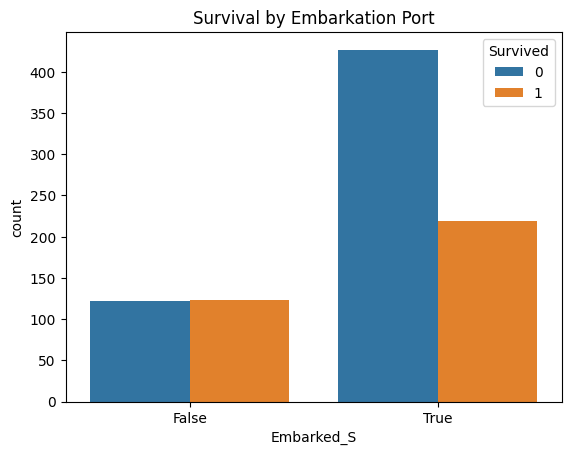

In [ ]:
sns.countplot(x="Embarked_S", hue="Survived", data=df)  # replace with Embarked_C / Embarked_Q as needed
plt.title("Survival by Embarkation Port")
plt.show()
